In [5]:
# Gender,Age,Occupation,Student Status,Average Grade (Expect),Average ECTS (Expect),ECTS Summer,ECTS Winter,Grade Summer (AVG),Grade Winter (AVG)


import pandas as pd
import numpy as np
from pathlib import Path

In [6]:
file_path = Path('../data.csv')
if file_path.exists():
	df = pd.read_csv(file_path)
else:
	print(f"File {file_path} does not exist.")



In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

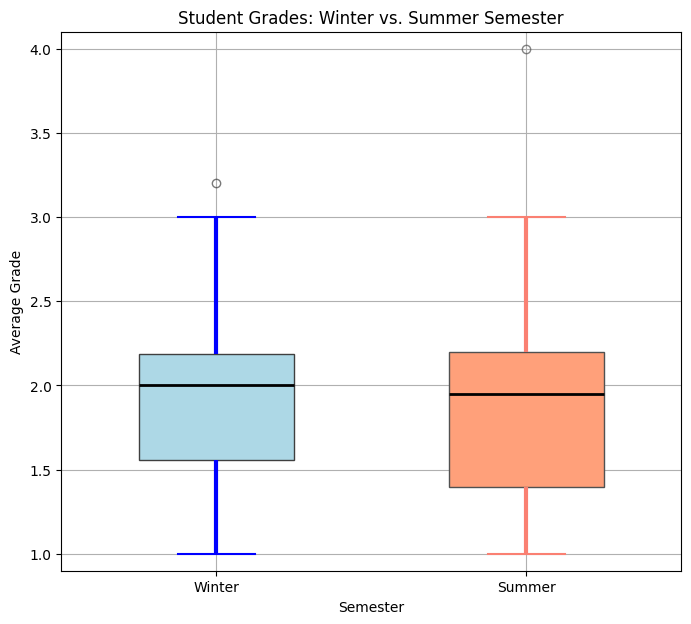

In [11]:
# ✅ Fix: Convert string numbers (with commas) to float
df["Grade Winter (AVG)"] = df["Grade Winter (AVG)"].astype(str).str.replace(",", ".").astype(float)
df["Grade Summer (AVG)"] = df["Grade Summer (AVG)"].astype(str).str.replace(",", ".").astype(float)

# Convert DataFrame to long format for boxplot
df_long = df.melt(value_vars=["Grade Winter (AVG)", "Grade Summer (AVG)"], 
                  var_name="Semester", value_name="Grade")

# Rename semester labels
df_long["Semester"] = df_long["Semester"].replace({"Grade Winter (AVG)": "Winter", 
                                                   "Grade Summer (AVG)": "Summer"})

plt.figure(figsize=(8, 7))  # Make the plot taller by increasing the height

# 🎯 1. Add Boxplot for Winter (Light Blue)
sns.boxplot(x="Semester", y="Grade", data=df_long[df_long["Semester"] == "Winter"], width=0.5, showfliers=True, 
            boxprops={'facecolor': 'lightblue'}, 
            whiskerprops={'color': 'blue', 'linewidth': 3},  # Thicker whisker lines
            capprops={'color': 'blue', 'linewidth': 1.5},
            flierprops={'marker': 'o', 'color': 'black', 'alpha': 0.7},
            medianprops={'color': 'black', 'linewidth': 2})

# 🎯 2. Add Boxplot for Summer (Light Orange)
sns.boxplot(x="Semester", y="Grade", data=df_long[df_long["Semester"] == "Summer"], width=0.5, showfliers=True, 
            boxprops={'facecolor': 'lightsalmon'},  # Light Orange (light salmon)
            whiskerprops={'color': 'salmon', 'linewidth': 3},  # Thicker whisker lines
            capprops={'color': 'salmon', 'linewidth': 1.5},
            flierprops={'marker': 'o', 'color': 'black', 'alpha': 0.7},
            medianprops={'color': 'black', 'linewidth': 2})

# 🔽 Invert Y-axis so lower grades (better) are at the top
plt.gca().invert_yaxis()

# Add padding to the x-axis (adjust space to the left and right)
plt.xlim(-0.5, 1.5)  # Padding on both sides

# Set explicit Y-axis limits to ensure data points above 1.5 and below 4 are included
plt.ylim(min(df[["Grade Winter (AVG)", "Grade Summer (AVG)"]].min()) - 0.1, 
         max(df[["Grade Winter (AVG)", "Grade Summer (AVG)"]].max()) + 0.1)

plt.xlabel("Semester")
plt.ylabel("Average Grade")
plt.title("Student Grades: Winter vs. Summer Semester")
plt.grid(True)

plt.show()


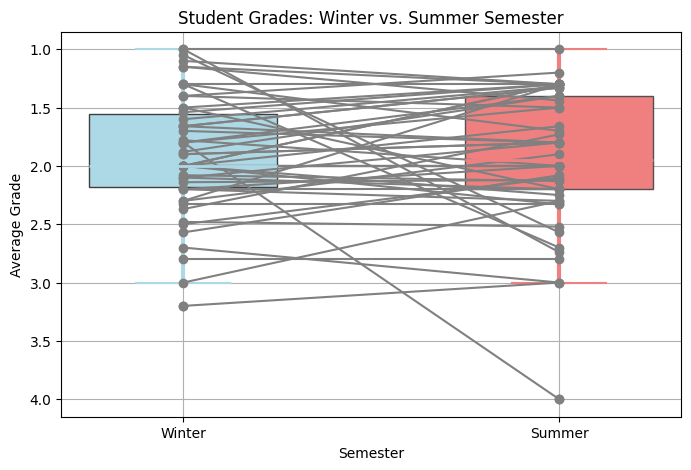

In [12]:
# ✅ Fix: Convert string numbers (with commas) to float
df["Grade Winter (AVG)"] = df["Grade Winter (AVG)"].astype(str).str.replace(",", ".").astype(float)
df["Grade Summer (AVG)"] = df["Grade Summer (AVG)"].astype(str).str.replace(",", ".").astype(float)

# Convert DataFrame to long format for boxplot
df_long = df.melt(value_vars=["Grade Winter (AVG)", "Grade Summer (AVG)"], 
                  var_name="Semester", value_name="Grade")

# Rename semester labels
df_long["Semester"] = df_long["Semester"].replace({"Grade Winter (AVG)": "Winter", 
                                                   "Grade Summer (AVG)": "Summer"})

plt.figure(figsize=(8, 5))

# 🎯 1. Add Boxplot for Winter (Light Blue) with all parts colored
sns.boxplot(x="Semester", y="Grade", data=df_long[df_long["Semester"] == "Winter"], width=0.5, showfliers=True, 
            boxprops={'facecolor': 'lightblue'}, 
            whiskerprops={'color': 'lightblue', 'linewidth': 3},  # Thicker whisker lines
            capprops={'color': 'lightblue', 'linewidth': 1.5},
            flierprops={'marker': 'o', 'color': 'black', 'alpha': 0.7},
            medianprops={'color': 'lightblue', 'linewidth': 2})

# 🎯 2. Add Boxplot for Summer (Light Red/Coral) with all parts colored
sns.boxplot(x="Semester", y="Grade", data=df_long[df_long["Semester"] == "Summer"], width=0.5, showfliers=True, 
            boxprops={'facecolor': 'lightcoral'}, 
            whiskerprops={'color': 'lightcoral', 'linewidth': 3},  # Thicker whisker lines
            capprops={'color': 'lightcoral', 'linewidth': 1.5},
            flierprops={'marker': 'o', 'color': 'black', 'alpha': 0.7},
            medianprops={'color': 'lightcoral', 'linewidth': 2})

# 🎯 3. Add Paired Line Plot (Shows individual changes) with lighter grey lines
for i in range(len(df)):
    plt.plot(["Winter", "Summer"], 
             [df.loc[i, "Grade Winter (AVG)"], df.loc[i, "Grade Summer (AVG)"]],
             marker="o", linestyle="-", alpha=1, color="grey")

# 🔽 Invert Y-axis so lower grades (better) are at the top
plt.gca().invert_yaxis()

plt.xlabel("Semester")
plt.ylabel("Average Grade")
plt.title("Student Grades: Winter vs. Summer Semester")
plt.grid(True)

plt.show()


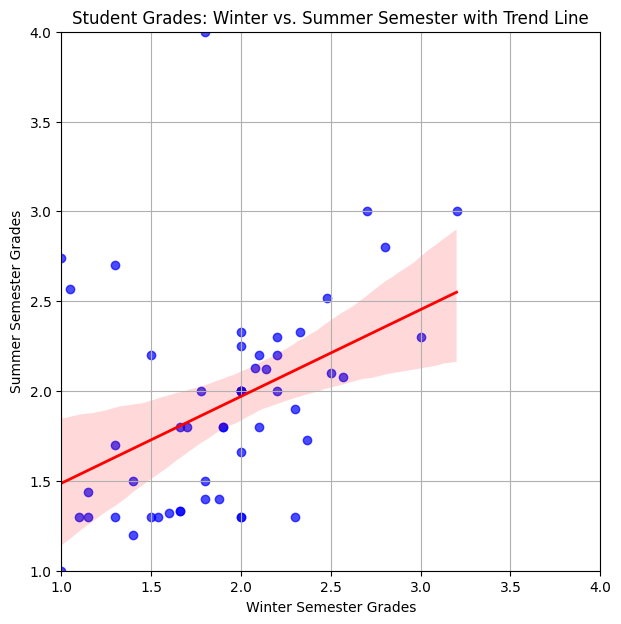

In [14]:
# ✅ Fix: Convert string numbers (with commas) to float
df["Grade Winter (AVG)"] = df["Grade Winter (AVG)"].astype(str).str.replace(",", ".").astype(float)
df["Grade Summer (AVG)"] = df["Grade Summer (AVG)"].astype(str).str.replace(",", ".").astype(float)

# Create a scatter plot with a trend line
plt.figure(figsize=(8, 7))

# Plot the scatter points
plt.scatter(df["Grade Winter (AVG)"], df["Grade Summer (AVG)"], color="blue", alpha=0.7)

# Add the trend line using seaborn's regplot
sns.regplot(x="Grade Winter (AVG)", y="Grade Summer (AVG)", data=df, scatter=False, color="red", line_kws={"linewidth": 2})

# Set the same range for both axes (based on min and max values of both axes)
min_value = min(df["Grade Winter (AVG)"].min(), df["Grade Summer (AVG)"].min())
max_value = max(df["Grade Winter (AVG)"].max(), df["Grade Summer (AVG)"].max())

# Set the same limits for both axes
plt.xlim(1, 4)  # Add padding for better visualization
plt.ylim(1, 4)

# Ensure equal aspect ratio for both axes
plt.gca().set_aspect('equal', adjustable='box')

# Add labels and title
plt.xlabel("Winter Semester Grades")
plt.ylabel("Summer Semester Grades")
plt.title("Student Grades: Winter vs. Summer Semester with Trend Line")
plt.grid(True)

# Show plot
plt.show()
